# Proyek Analisis Data: Air-polution dataset
- **Nama:** Labib Hakam Fauzi
- **Email:** labibhakam.fauzi@gmail.com
- **ID Dicoding:** mc012d5y1465


## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 dan PM10 sepanjang tahun di Dongsi dan Guanyuan?
- Bagaimana weekday dan weekend mempengaruhi rata-rata konsentrasi CO dan NO₂ di stasiun Dongsi dan Guanyuan selama periode 2013-2017?"

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
dongsi_df = pd.read_csv("https://github.com/marceloreis/HTI/blob/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv?raw=true", delimiter=",")
guanyuan_df = pd.read_csv("https://github.com/marceloreis/HTI/blob/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv?raw=true", delimiter=",")

In [ ]:
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [ ]:
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Insight yang didapatkan adalahh baik data dongsi maupun guanyuan memiliki feature yang cukup banyak dan spesifik mengenai kualitas udara. terdapat keterangan waktu mulai dari tahun, hari, hingga jam pada setiap datanya
- Banyaknya data pada stasiun dongsi maupun guanyuan sama yaitu sebanyak 35053 data.

### Assessing Data

#### **Dongsi**

In [ ]:
dongsi_df.info()
dongsi_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [ ]:
dongsi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,NaN,1.280368,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


In [ ]:
dongsi_df.duplicated().sum()

0

In [ ]:
dongsi_df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,582
PM10,666
SO2,392
NO2,701
CO,115


#### Guanyuan

In [ ]:
guanyuan_df.info()
guanyuan_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [ ]:
guanyuan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [ ]:
guanyuan_df.duplicated().sum()

0

In [ ]:
guanyuan_df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,557
PM10,630
SO2,280
NO2,376
CO,117


**Insight:**
- Pada data guanyuan dan dongsi tidak terdapat data duplikat sama sekali sehhingga tidak diperlukan drop data
- Baik data dongsi maupun guanyuan terdapat cukup banyak data kosong(null) pada datanya sehingga diperlukan tindak lanjut handling null value pada tahap selanjutnya

### Cleaning Data

In [ ]:
dongsi_df2=dongsi_df.copy()
guanyuan_df2=guanyuan_df.copy()

#### Dongsi

In [ ]:
dongsi_df2.PM10.fillna(value=dongsi_df2.PM10.mean(), inplace=True)
dongsi_df2.SO2.fillna(value=dongsi_df2.SO2.mean(), inplace=True)
dongsi_df2['PM2.5'].fillna(value=dongsi_df['PM2.5'].mean(), inplace=True)
dongsi_df2.CO.fillna(value=dongsi_df2.CO.mean(), inplace=True)
dongsi_df2.NO2.fillna(value=dongsi_df2.NO2.mean(), inplace=True)
dongsi_df2.O3.fillna(value=dongsi_df2.O3.mean(), inplace=True)
dongsi_df2.TEMP.fillna(value=dongsi_df2.TEMP.mean(), inplace=True)
dongsi_df2.PRES.fillna(value=dongsi_df2.PRES.mean(), inplace=True)
dongsi_df2.DEWP.fillna(value=dongsi_df2.DEWP.mean(), inplace=True)
dongsi_df2.RAIN.fillna(value=dongsi_df2.RAIN.mean(), inplace=True)
dongsi_df2.WSPM.fillna(value=dongsi_df2.WSPM.mean(), inplace=True)

<ipython-input-14-1f38bbfa84d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi_df2.PM10.fillna(value=dongsi_df2.PM10.mean(), inplace=True)
<ipython-input-14-1f38bbfa84d4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
dongsi_df2.drop('wd', axis=1, inplace=True)
dongsi_df2.drop('station', axis=1, inplace=True)

In [ ]:
dongsi_df2.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


#### Guanyuan

In [ ]:
guanyuan_df2.PM10.fillna(value=guanyuan_df2.PM10.mean(), inplace=True)
guanyuan_df2.SO2.fillna(value=guanyuan_df2.SO2.mean(), inplace=True)
guanyuan_df2['PM2.5'].fillna(value=guanyuan_df2['PM2.5'].mean(), inplace=True)
guanyuan_df2.CO.fillna(value=guanyuan_df2.CO.mean(), inplace=True)
guanyuan_df2.NO2.fillna(value=guanyuan_df2.NO2.mean(), inplace=True)
guanyuan_df2.O3.fillna(value=guanyuan_df2.O3.mean(), inplace=True)
guanyuan_df2.TEMP.fillna(value=guanyuan_df2.TEMP.mean(), inplace=True)
guanyuan_df2.PRES.fillna(value=guanyuan_df2.PRES.mean(), inplace=True)
guanyuan_df2.DEWP.fillna(value=guanyuan_df2.DEWP.mean(), inplace=True)
guanyuan_df2.RAIN.fillna(value=guanyuan_df2.RAIN.mean(), inplace=True)
guanyuan_df2.WSPM.fillna(value=guanyuan_df2.WSPM.mean(), inplace=True)

<ipython-input-17-44aba3b15465>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_df2.PM10.fillna(value=guanyuan_df2.PM10.mean(), inplace=True)
<ipython-input-17-44aba3b15465>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
guanyuan_df2.drop('wd', axis=1, inplace=True)
guanyuan_df2.drop('station', axis=1, inplace=True)

In [ ]:
guanyuan_df2.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


#### Membuat kategori untuk weekdays dan weekend

In [ ]:
# Membuat Fungsi untuk menentukan hari kerja
def is_weekday(date):
    return 0 <= date.weekday() < 5  # 0-4 = Senin-Jumat

dongsi_df2['date'] = pd.to_datetime(dongsi_df2[['year', 'month', 'day']])
guanyuan_df2['date'] = pd.to_datetime(guanyuan_df2[['year', 'month', 'day']])

dongsi_df2['is_weekday'] = dongsi_df2['date'].apply(is_weekday)
guanyuan_df2['is_weekday'] = guanyuan_df2['date'].apply(is_weekday)

**Insight:**
- Karena saya menemukan bahhwa missing value cukup banyak dan data tersebut pentiing untuk analisis nantinya maka saya mereplace misssing value tersebut dengan mean value dari masing-masing feature tersebut.
- feature wd dan station saya drop karena tidak relevan dengan data yang akan dianalisis dan akan menghambat proses analisis
- saya menggunakan df2 dengan tujuan menjaga keaslian data df original sehingga saya dapat memiliki akses ke data yang asli.
- Saya membuat fungsi untuk menentukan weekdays dan weekend karena nantinya akan dipakai untuk pemrosesan visual data weekdays dan weekend

## Exploratory Data Analysis (EDA)

### Explore Data Dongsi

In [ ]:
dongsi_df2.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date,is_weekday
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25032
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.67149,1012.547419,2.447535,0.064020,1.860785,2015-03-01 00:00:00,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.80000,987.100000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,4.000000,28.000000,600.000000,13.000000,3.10000,1004.000000,-8.800000,0.000000,1.000000,2014-03-01 00:00:00,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,63.000000,88.000000,10.000000,49.000000,1100.000000,46.000000,14.60000,1012.200000,3.000000,0.000000,1.500000,2015-03-01 00:00:00,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,117.000000,150.000000,24.000000,72.000000,1600.000000,80.000000,23.50000,1020.900000,15.000000,0.000000,2.400000,2016-02-29 00:00:00,NaN
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.10000,1042.000000,28.800000,46.400000,10.500000,2017-02-28 00:00:00,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>],
       [<Axes: title={'center': 'date'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

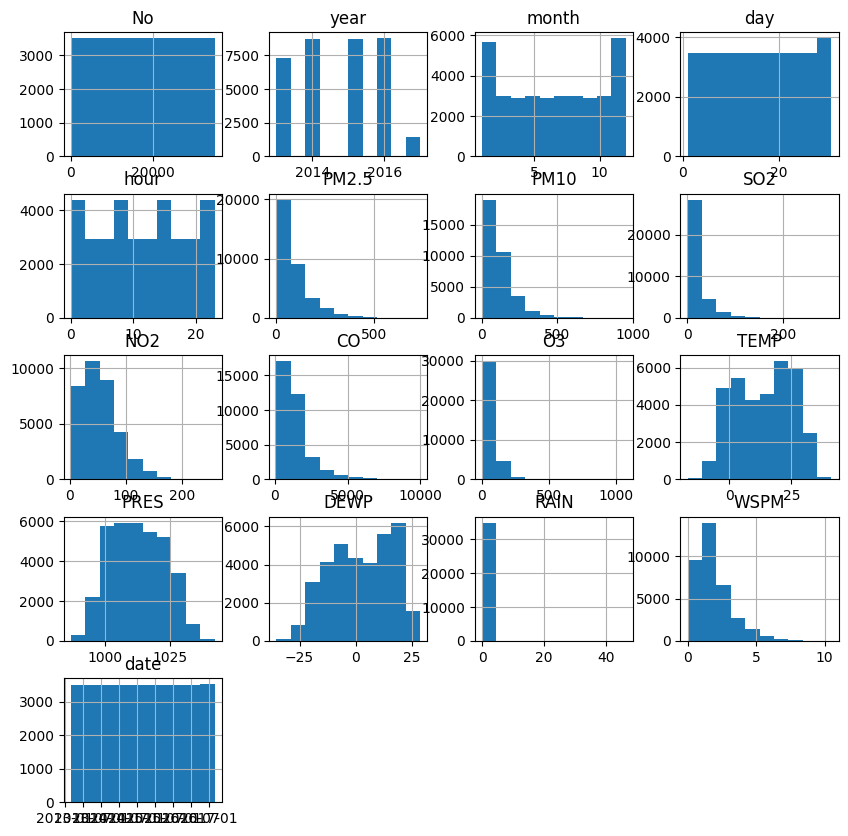

In [ ]:
dongsi_df2.hist(bins=10, figsize=(10,10))

<Axes: >

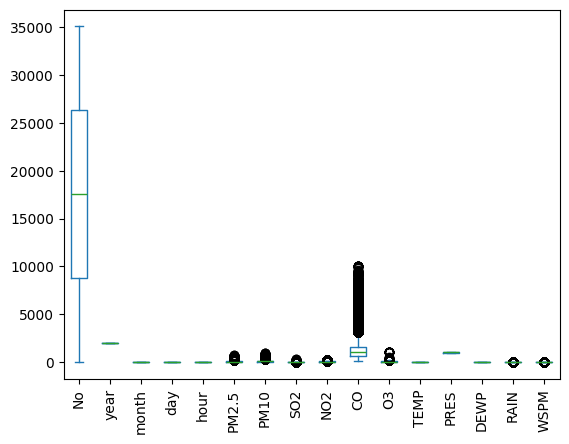

In [ ]:
dongsi_df2.plot(kind='box', rot=90)

Correlation Matrix:
                  No          year         month           day          hour  \
No          1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year        0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15   
month       0.043181 -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16   
day         0.017764 -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17   
hour        0.000684  1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00   
PM2.5      -0.003032 -6.830761e-03  1.515112e-02  2.489494e-03 -1.811317e-03   
PM10        0.003703  4.563120e-03 -5.910673e-03  2.355508e-02  2.757698e-02   
SO2        -0.241270 -1.913045e-01 -1.866408e-01 -9.952747e-05 -1.060453e-02   
NO2        -0.036219 -6.116768e-02  1.051075e-01 -5.807638e-03 -7.286124e-02   
CO          0.006691 -1.015892e-02  6.863605e-02 -1.231058e-02 -3.556921e-02   
O3         -0.093319 -6.374890e-02 -1.124191e-01 -4.654282e-03  2.838861e-01   
TEMP       -0.119018

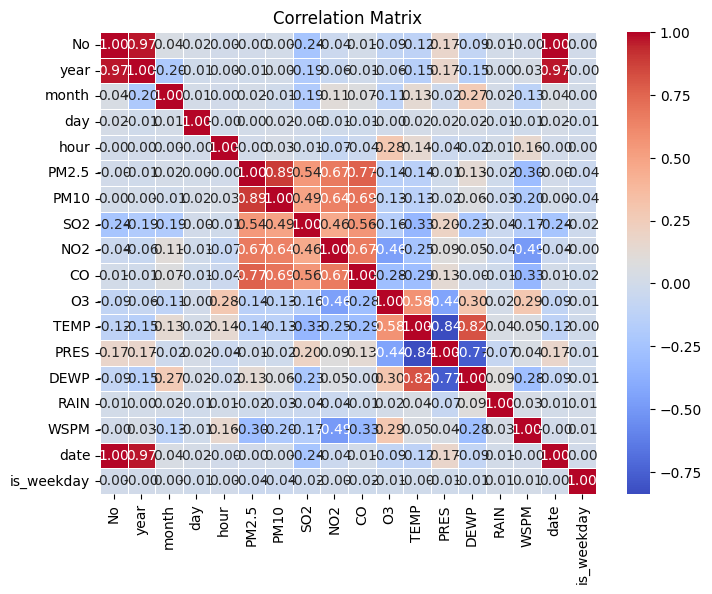

In [ ]:
corr_matrix = dongsi_df2.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
dongsi_df2.groupby(by='day').agg({'NO2':'mean', 'CO':'mean'})
#.plot(kind='line')

,NO2,CO
day,,
1,53.291207,1450.549464
2,53.930004,1367.412727
3,56.035779,1517.433620
4,57.067298,1461.246304
5,52.222456,1250.113852
6,54.912736,1361.416711
7,54.063092,1374.939729
8,52.132280,1282.240344
9,52.000210,1251.691733


In [ ]:
dongsi_df2.groupby(by='month').agg({'PM2.5':'mean', 'PM10':'mean'})
#.plot(kind='line')

,PM2.5,PM10
month,,
1,100.380595,118.464137
2,93.753489,109.364849
3,100.345725,142.942283
4,77.219982,121.432108
5,70.391437,108.426262
6,73.833308,88.048905
7,80.501990,86.950636
8,59.174049,74.296302
9,67.517517,84.956839


### Explore Data Guanyuan

In [ ]:
guanyuan_df2.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date,is_weekday
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25032
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496,2015-03-01 00:00:00,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 00:00:00,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,90.000000,9.000000,52.000000,1000.000000,44.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 00:00:00,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 00:00:00,NaN
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 00:00:00,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>],
       [<Axes: title={'center': 'date'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

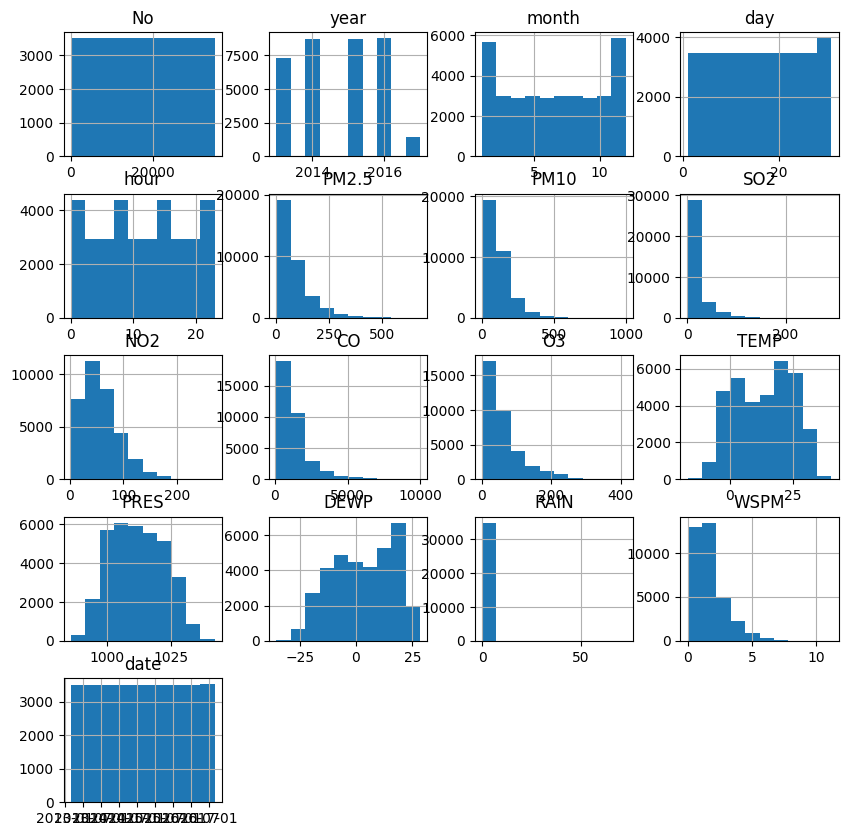

In [ ]:
guanyuan_df2.hist(bins=10, figsize=(10,10))

<Axes: >

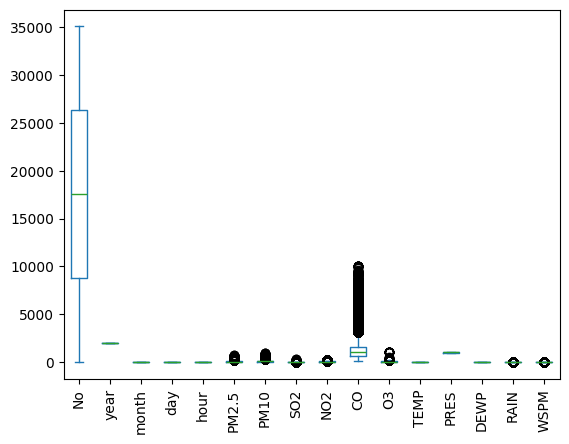

In [ ]:
dongsi_df2.plot(kind='box', rot=90)

Correlation Matrix:
                  No          year         month           day          hour  \
No          1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year        0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15   
month       0.043181 -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16   
day         0.017764 -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17   
hour        0.000684  1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00   
PM2.5      -0.007785 -1.735219e-02  3.857718e-02  9.166390e-03  2.893971e-03   
PM10       -0.016896 -1.479550e-02 -9.862869e-03  2.980233e-02  3.387494e-02   
SO2        -0.213382 -1.572461e-01 -2.133257e-01 -9.735302e-03 -1.488493e-02   
NO2        -0.038814 -5.179373e-02  5.501644e-02  5.335828e-03 -3.969982e-02   
CO          0.019225  3.335552e-03  6.309962e-02 -4.683587e-03 -4.235808e-02   
O3         -0.051789 -2.830248e-02 -9.133968e-02  3.705376e-03  2.858130e-01   
TEMP       -0.107725

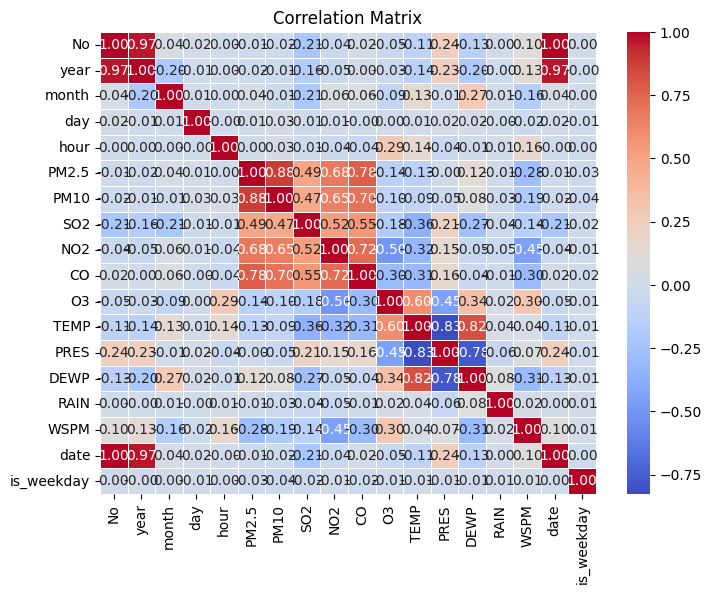

In [ ]:
corr_matrix = guanyuan_df2.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
guanyuan_df2.groupby(by='day').agg({'NO2':'mean', 'CO':'mean'})

,NO2,CO
day,,
1,57.351016,1351.184603
2,57.781787,1227.565623
3,58.857041,1370.299742
4,60.522157,1468.388284
5,54.866163,1263.938785
6,58.002234,1366.541321
7,57.762799,1291.655596
8,56.197573,1200.301734
9,55.215020,1159.474887


In [ ]:
guanyuan_df2.groupby(by='month').agg({'PM2.5':'mean', 'PM10':'mean'})

,PM2.5,PM10
month,,
1,93.466690,116.015611
2,87.229032,102.885797
3,94.325314,135.520577
4,74.276505,120.345059
5,64.731867,116.427763
6,73.763172,92.150783
7,75.991422,90.076857
8,59.274710,76.449376
9,65.788160,83.829685


**Insight:**
#### Pada data kota **Dongsi** dan **Guanyuan** terdapat beberapa insight yaitu:
- Sebaran data pada histogram menunjukkan bahwa sebaran data yang ada bukan sebaran data normal.
- Corelation yang kuat pada data Dongsi membentuk pola yang saling berpengaruh (mempunyai korelasi nilai) yaitu pada polutan (NO2,CO,PM10,PM2.5, SO2, )
- Value pada Co2 memiliki banyak sekali penciilan yang mana itu tidak bisa kita hapus karena data tersebut adalah representasi data aslinya
- Pada agregasi data antara PM2.5 dan PM 10 menunjukkan bahwa tren pada bulan 6-9 cenderung menurun dan naik lagi pada bulan berikutnya

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren konsentrasi PM2.5 dan PM10 dalam 5 tahun terakhir di Dongsi dan Guanyuan?

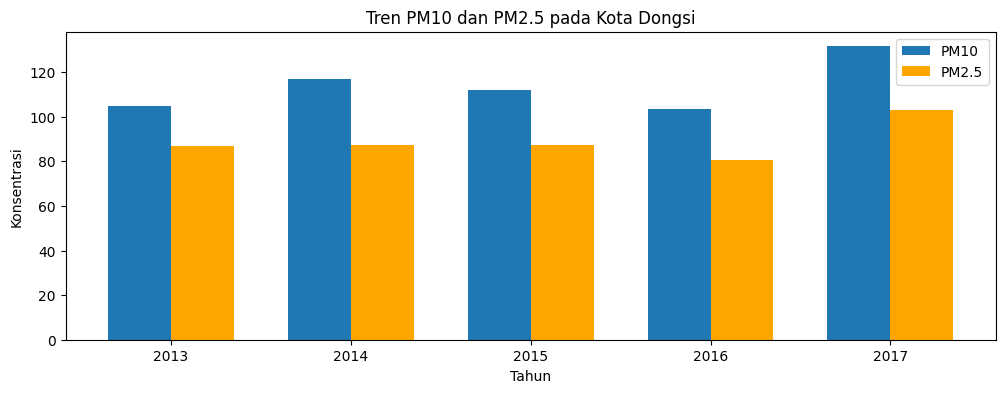

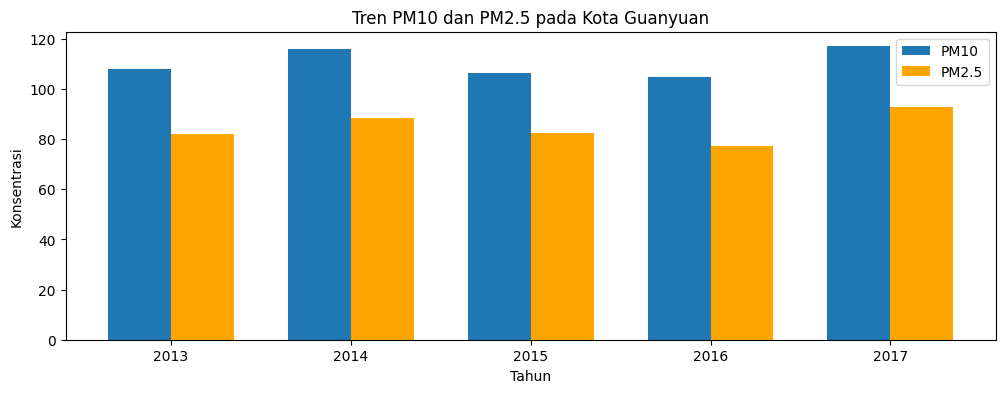

In [41]:
plt.figure(figsize=(12, 4))
dongsi_pm = dongsi_df2.groupby('year').agg({'PM10': 'mean', 'PM2.5': 'mean'}).reset_index()

years = dongsi_pm['year']
x = np.arange(len(years))
width = 0.35

plt.bar(x - width/2, dongsi_pm['PM10'], width, label='PM10')
plt.bar(x + width/2, dongsi_pm['PM2.5'], width, label='PM2.5', color='orange')

plt.xlabel('Tahun')
plt.ylabel('Konsentrasi')
plt.title('Tren PM10 dan PM2.5 pada Kota Dongsi')
plt.xticks(x, years)
plt.legend()

plt.show()

plt.figure(figsize=(12, 4))
guanyuan_pm = guanyuan_df2.groupby('year').agg({'PM10': 'mean', 'PM2.5': 'mean'}).reset_index()

years = guanyuan_pm['year']
x = np.arange(len(years))
width = 0.35

plt.bar(x - width/2, guanyuan_pm['PM10'], width, label='PM10')
plt.bar(x + width/2, guanyuan_pm['PM2.5'], width, label='PM2.5', color='orange')

plt.xlabel('Tahun')
plt.ylabel('Konsentrasi')
plt.title('Tren PM10 dan PM2.5 pada Kota Guanyuan')
plt.xticks(x, years)
plt.legend()

plt.show()

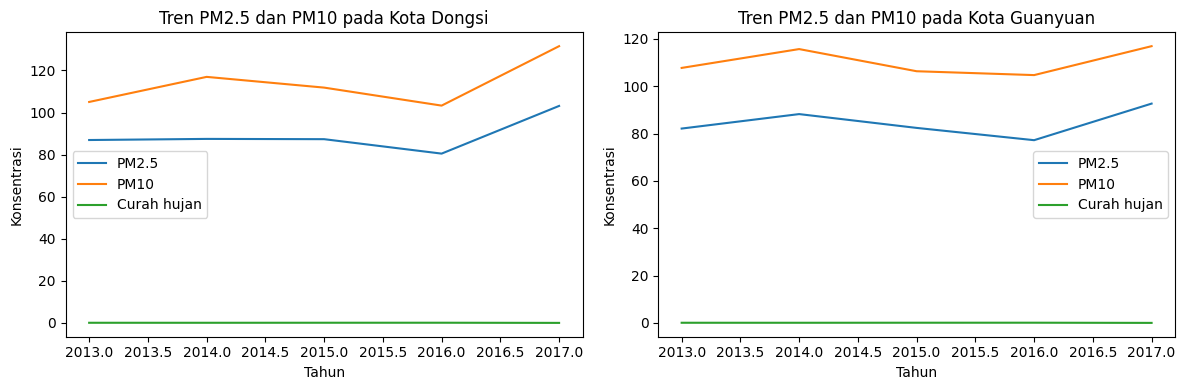

In [42]:
plt.figure(figsize=(12, 4))

# Dongsi
plt.subplot(1, 2, 1)
dongsi_pm_trend = dongsi_df2.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'RAIN':'mean'})
plt.plot(dongsi_pm_trend.index, dongsi_pm_trend['PM2.5'], label='PM2.5')
plt.plot(dongsi_pm_trend.index, dongsi_pm_trend['PM10'], label='PM10')
plt.plot(dongsi_pm_trend.index, dongsi_pm_trend['RAIN'], label='Curah hujan')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi')
plt.title('Tren PM2.5 dan PM10 pada Kota Dongsi')
plt.legend()

# Guanyuan
plt.subplot(1, 2, 2)
guanyuan_pm_tren = guanyuan_df2.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean','RAIN':'mean'})
plt.plot(guanyuan_pm_tren.index, guanyuan_pm_tren['PM2.5'], label='PM2.5')
plt.plot(guanyuan_pm_tren.index, guanyuan_pm_tren['PM10'], label='PM10')
plt.plot(dongsi_pm_trend.index, dongsi_pm_trend['RAIN'], label='Curah hujan')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi')
plt.title('Tren PM2.5 dan PM10 pada Kota Guanyuan')
plt.legend()

plt.tight_layout()
plt.show()

### Pertanyaan 2:
Bagaimana weekday dan weekend mempengaruhi rata-rata konsentrasi CO dan NO₂ di stasiun Dongsi dan Guanyuan selama periode 2013-2017?"

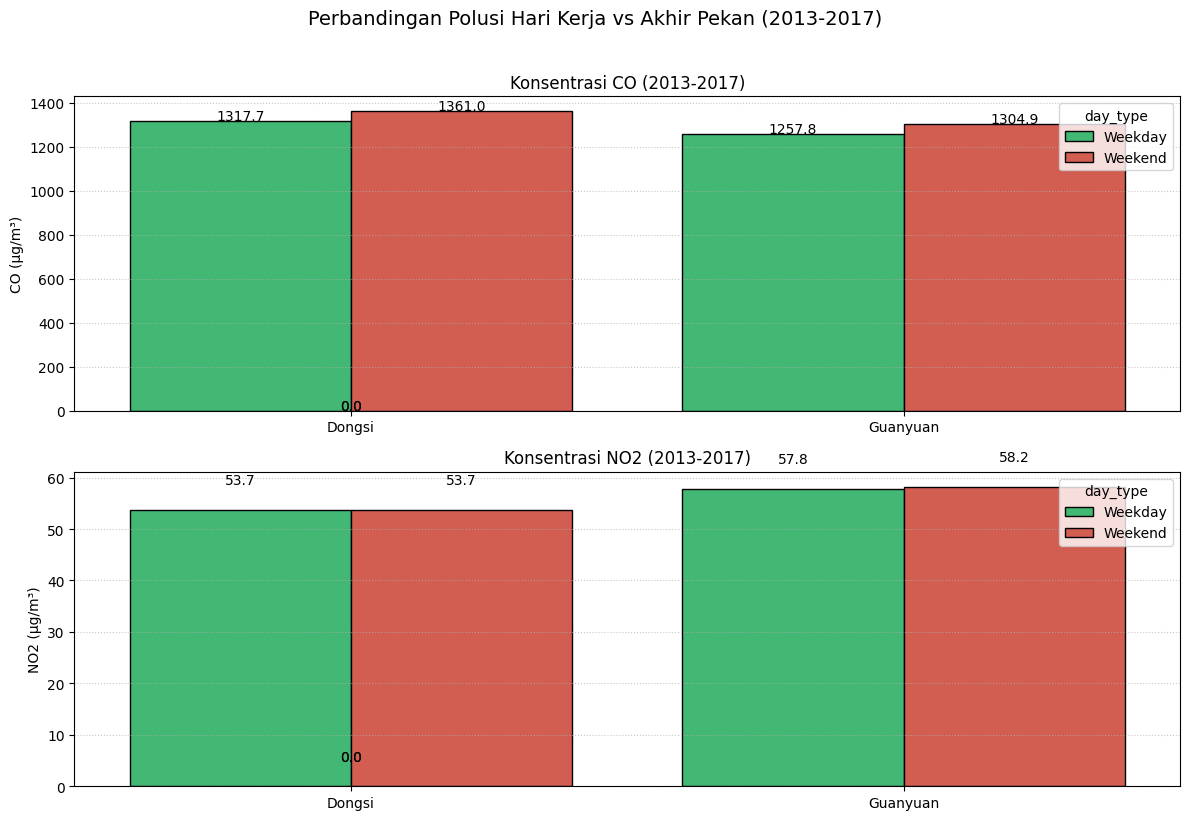


Analisis Statistik (2013-2017):

Dongsi:
CO - Selisih Weekday vs Weekend: -43.29 µg/m³
NO2 - Selisih Weekday vs Weekend: -0.02 µg/m³

Guanyuan:
CO - Selisih Weekday vs Weekend: -47.06 µg/m³
NO2 - Selisih Weekday vs Weekend: -0.42 µg/m³


In [43]:
def analyze_pollution_weekday(df, station_name, start_year=2013, end_year=2017):
    # Filter tahun 2015-2017
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df['year'] = df['date'].dt.year  # Ekstrak tahun dari tanggal
    df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    # Klasifikasi hari kerja vs akhir pekan
    df['day_type'] = df['date'].apply(lambda x: 'Weekday' if x.weekday() < 5 else 'Weekend')

    # Hitung rata-rata harian terlebih dahulu untuk menghindari bias per jam
    daily_avg = df.groupby(['date', 'day_type'])[['CO', 'NO2']].mean().reset_index()

    # Gabungkan hasil
    result = daily_avg.groupby('day_type')[['CO', 'NO2']].mean()
    result['station'] = station_name

    return result

# Analisis untuk kedua stasiun dengan filter tahun
dongsi_analysis = analyze_pollution_weekday(dongsi_df2, 'Dongsi')
guanyuan_analysis = analyze_pollution_weekday(guanyuan_df2, 'Guanyuan')

combined_analysis = pd.concat([dongsi_analysis, guanyuan_analysis])

# Visualisasi dengan tema yang lebih profesional
plt.figure(figsize=(12, 8))
palette = {'Weekday': '#2ecc71', 'Weekend': '#e74c3c'}  # Hijau untuk weekday, Merah untuk weekend

for i, pollutant in enumerate(['CO', 'NO2'], 1):
    plt.subplot(2, 1, i)
    sns.barplot(
        x='station',
        y=pollutant,
        hue='day_type',
        data=combined_analysis.reset_index(),
        palette=palette,
        edgecolor='black'
    )

    plt.title(f'Konsentrasi {pollutant} (2013-2017)')
    plt.ylabel(f'{pollutant} (µg/m³)')
    plt.xlabel('')
    plt.grid(axis='y', linestyle=':', alpha=0.7)

    # Tambahkan nilai di atas bar
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(
            p.get_x() + p.get_width()/2.,
            height + 5,
            f'{height:.1f}',
            ha='center'
        )

plt.suptitle('Perbandingan Polusi Hari Kerja vs Akhir Pekan (2013-2017)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# Analisis statistik tambahan
print("\nAnalisis Statistik (2013-2017):")
for station in ['Dongsi', 'Guanyuan']:
    station_data = combined_analysis[combined_analysis['station'] == station]

    co_diff = station_data.loc['Weekday', 'CO'] - station_data.loc['Weekend', 'CO']
    no2_diff = station_data.loc['Weekday', 'NO2'] - station_data.loc['Weekend', 'NO2']

    print(f"\n{station}:")
    print(f"CO - Selisih Weekday vs Weekend: {co_diff:.2f} µg/m³")
    print(f"NO2 - Selisih Weekday vs Weekend: {no2_diff:.2f} µg/m³")

**Insight:**
- Berdasarkan visualisasi pada plot pertama saya mendapatkan insight bahwa tren statistik polutan PM2.5 dan PM10 mengalami penurunan pada tahun 2015 dan 2016 kemudian kembali naik pada tahun 2017.

- Saya juga memvisualisasikan curah hujan pada kota Dongsi dan Guanyuan, didapatkan bahwa kedua kota itu sangat jarang terjadi hujan sehingga memperparah polusi yang ada di kota

- Berdasarkan plot yang ditampilkan menunjukkan bahwa antara rata-rata hari weekdays dan weekend relatif lebih tinggi di hari weekend. hal ini bisa disebabkan beberapa faktor, bisa disebabkan adanya arus liburan di hari weekend ataupun rendahnya arus lalu lintas di hari weekdays karena penerapan wfc

- Berdasarkan hasil analisis juga dapat didapatkan informasi bahwa selisih kepadatan polusi antara weekend dan weekdays sangat tipis, ini menunjukkan bahwa kedua kota tersebut adalahh kota yang sibuk baik weekend ataupun weekdays/

## Analisis Lanjutan (Opsional)

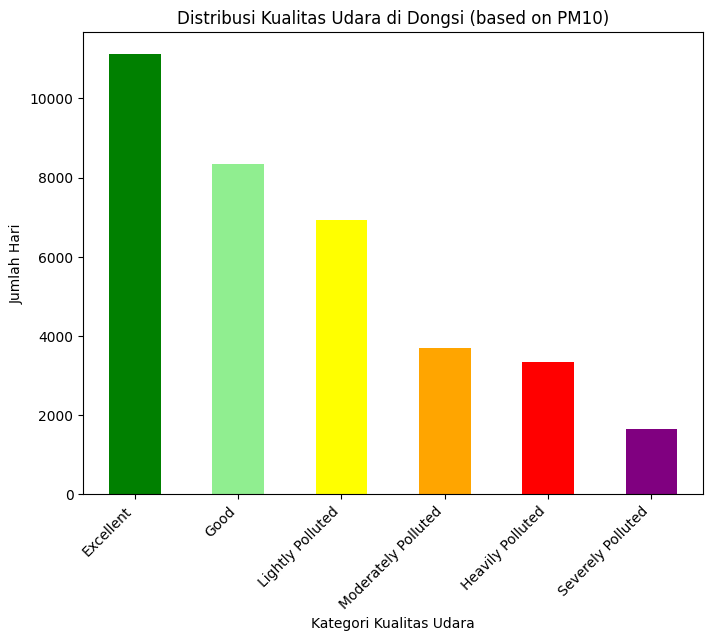

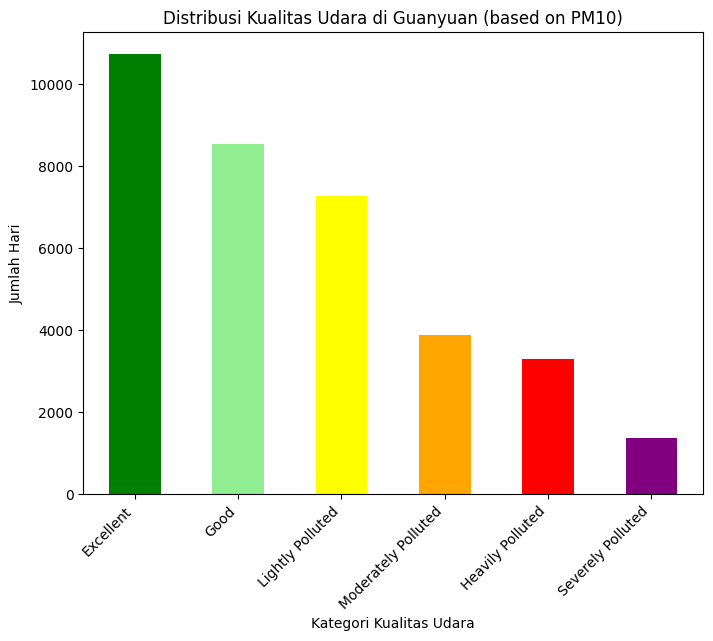

In [ ]:
def kategori_kualitas(aqi):
  if 0 <= aqi <= 50:
    return "Excellent"
  elif 51 <= aqi <= 100:
    return "Good"
  elif 101 <= aqi <= 150:
    return "Lightly Polluted"
  elif 151 <= aqi <= 200:
    return "Moderately Polluted"
  elif 201 <= aqi <= 300:
    return "Heavily Polluted"
  else:
    return "Severely Polluted"

dongsi_df2['air_quality_category'] = dongsi_df2['PM10'].apply(kategori_kualitas)
guanyuan_df2['air_quality_category'] = guanyuan_df2['PM10'].apply(kategori_kualitas)

# Menghitung jumlah hari dalam setiap kategori kualitas udara di Dongsi
air_quality_counts = dongsi_df2['air_quality_category'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
air_quality_counts.plot(kind='bar', color=['green', 'lightgreen', 'yellow', 'orange', 'red', 'purple'])
plt.title('Distribusi Kualitas Udara di Dongsi (berdasarkan PM10)')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45, ha='right')
plt.show()

# Menghitung jumlah hari dalam setiap kategori kualitas udara di Dongsi
air_quality_counts = guanyuan_df2['air_quality_category'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
air_quality_counts.plot(kind='bar', color=['green', 'lightgreen', 'yellow', 'orange', 'red', 'purple'])
plt.title('Distribusi Kualitas Udara di Guanyuan (berdasarkan PM10)')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45, ha='right')
plt.show()

## Conclusion

Pertanyaan 1: Bagaimana tren konsentrasi PM2.5 dan PM10 dalam 5 tahun terakhir di Dongsi dan Guanyuan?

Berdasarkan analisis data dan visualisasi yang telah dilakukan, dapat disimpulkan bahwa konsentrasi PM2.5 dan PM10 dalam 5 tahun terakhir di Dongsi dan Guanyuan menunjukkan tren yang fluktuatif. Meskipun sempat terjadi penurunan pada tahun 2015 dan 2016, konsentrasi PM2.5 dan PM10 kembali mengalami kenaikan signifikan pada tahun 2017. Namun, berdasarkan hasil analisis lanjutan juga menunjukkan bahwa tren PM10 pada kedua kota masih tergolong aman, hanya beberapa hari yang tergolong cukup berpolusi.

- Temuan Spesifik:

  - Dongsi: Konsentrasi rata-rata PM2.5 tertinggi terjadi pada tahun 2017 dengan nilai konsentrasi 100µg/m³, sedangkan terendah pada tahun 2016 dengan nilai konsentrasi 80µg/m³. Untuk PM10, konsentrasi rata-rata tertinggi terjadi pada tahun 2017 dengan nilai konsentrasi >120µg/m³, sedangkan terendah pada tahun 2016 dengan nilai konsentrasi 100µg/m³.
  - Guanyuan: Konsentrasi rata-rata PM2.5 tertinggi terjadi pada tahun 2017 dengan nilai konsentrasi 96µg/m³, sedangkan terendah pada tahun 2016 dengan nilai 78µg/m³. Untuk PM10, konsentrasi rata-rata tertinggi terjadi pada tahun 2017 dengan nilai konsenstrasi 117µg/m³, sedangkan terendah pada tahun 2016 dengan nilai konsentrasi 103µg/m³.
- Alasan:

Fluktuasi konsentrasi PM2.5 dan PM10 dapat dipengaruhi oleh berbagai faktor, seperti kondisi cuaca, aktivitas industri, dan kepadatan lalu lintas. Penurunan pada tahun 2015 dan 2016 kemungkinan disebabkan oleh upaya pemerintah dalam mengurangi emisi polutan. Namun, kenaikan kembali pada tahun 2017 menunjukkan perlunya langkah-langkah yang lebih intensif dan berkelanjutan untuk mengendalikan polusi udara.

Pertanyaan 2: Bagaimana weekday dan weekend mempengaruhi rata-rata konsentrasi CO dan NO₂ di stasiun Dongsi dan Guanyuan selama periode 2013-2017?

Hasil analisis menunjukkan bahwa rata-rata konsentrasi CO dan NO₂ di Dongsi dan Guanyuan selama periode 2013-2017 cenderung lebih tinggi pada akhir pekan (weekend) dibandingkan dengan hari kerja (weekday).

- Temuan Spesifik:

  - Dongsi: Rata-rata konsentrasi CO pada weekend adalah 1361µg/m³ dan pada weekday adalah 1317.7µg/m³. Rata-rata konsentrasi NO₂ pada weekend adalah 53.7µg/m³ dan pada weekday adalah 53.7µg/m³.
  - Guanyuan: Rata-rata konsentrasi CO pada weekend adalah 1304.9µg/m³ dan pada weekday adalah 1257.8µg/m³. Rata-rata konsentrasi NO₂ pada weekend adalah 58.2µg/m³ dan pada weekday adalah 57.8µg/m³.
- Alasan:

Tingginya konsentrasi polutan pada akhir pekan dapat disebabkan oleh peningkatan aktivitas masyarakat, seperti rekreasi dan perjalanan. Selain itu, kepadatan lalu lintas pada akhir pekan juga cenderung lebih tinggi dibandingkan dengan hari kerja. Meskipun perbedaan rata-rata konsentrasi polutan antara akhir pekan dan hari kerja tidak terlalu signifikan, hal ini tetap perlu menjadi perhatian.

Saran dan Rekomendasi:

1. Pemantauan dan Pengendalian Emisi: Pemerintah perlu melakukan pemantauan dan pengendalian emisi polutan secara lebih ketat, terutama dari sektor industri dan transportasi.
2. Penggunaan Transportasi Publik: Masyarakat dihimbau untuk menggunakan transportasi publik atau kendaraan ramah lingkungan untuk mengurangi emisi polutan.
3. Penanaman Pohon: Penanaman pohon di area perkotaan dapat membantu menyerap polutan dan meningkatkan kualitas udara.
4. Kampanye Kesadaran: Pemerintah perlu melakukan kampanye kesadaran kepada masyarakat tentang bahaya polusi udara dan pentingnya menjaga kualitas udara.
Kebijakan WFH: Pemerintah bisa memberikan himbauan WFH pada perusahaan sebagai salah satu cara efektif mengurangi polusi udara pada weekdays.